In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv('spam.csv', encoding='Latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
v1,0.000000
v2,0.000000
Unnamed: 2,99.102656
Unnamed: 3,99.784637
Unnamed: 4,99.892319


In [ ]:
df.drop(columns=['Unnamed: 2'], inplace=True)

In [ ]:
df.head()

,v1,v2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN


In [ ]:
df.drop(columns=['Unnamed: 3'], inplace=True)

In [ ]:
df.drop(columns=['Unnamed: 4'], inplace=True)

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.rename(columns={'v1':'target'}, inplace=True)

In [ ]:
df.rename(columns={'v2': 'text'}, inplace=True)

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(5572, 2)

In [ ]:
import string

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

df['text'] = df['text'].apply(clean_text)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [ ]:
df['target'].value_counts()

,count
target,
0,4825
1,747


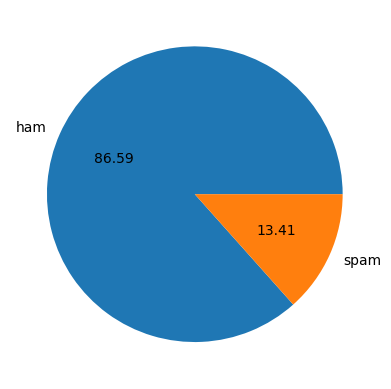

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
X = df['text']
y = df['target']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(len(x_train), len(y_train))


4457 4457


In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer = TfidfVectorizer(max_features=5000)
#x_train = vectorizer.fit_transform(x_train)
#x_test = vectorizer.transform(x_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),   # unigram + bigram
    min_df=2,
    max_df=0.95
)

In [ ]:
x_train = vectorizer.fit_transform(x_train).toarray()
x_test = vectorizer.transform(x_test).toarray()

In [ ]:
print(x_train.shape)
print(y_train.shape)


(4457, 7195)
(4457,)


In [ ]:
print(x_train.dtype)
print(y_train.dtype)

float64
int64


In [ ]:
df.shape

(5572, 2)

In [ ]:
#from sklearn.naive_bayes import MultinomialNB

#model = MultinomialNB()
#model.fit(x_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)
model.fit(x_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression()
#logreg.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9739910313901345
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.91      0.89      0.90       150

    accuracy                           0.97      1115
   macro avg       0.95      0.94      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
import numpy as np
np.unique(y_pred, return_counts=True)


(array([0, 1]), array([968, 147]))

In [ ]:
test_messages = [
    "Hi, are we still meeting at 5 pm today?",
    "Please find the attached report and let me know your feedback.",
    "I will call you after reaching home.",
    "Your order has been delivered successfully.",
    "Don't forget to bring the documents tomorrow.",
    "Congratulations! You have won a free iPhone. Click here now!",
    "Urgent! Your account is blocked. Verify immediately to continue.",
    "Win cash prizes up to ₹50,000. Limited time offer!",
    "Free recharge available. Claim now by clicking the link.",
    "You are selected for a lucky draw. Act fast!"
]

predictions = model.predict(vectorizer.transform(test_messages))

for msg, pred in zip(test_messages, predictions):
    print(f"{msg} --> {'SPAM' if pred==1 else 'HAM'}")


Hi, are we still meeting at 5 pm today? --> HAM
Please find the attached report and let me know your feedback. --> HAM
I will call you after reaching home. --> HAM
Your order has been delivered successfully. --> HAM
Don't forget to bring the documents tomorrow. --> HAM
Congratulations! You have won a free iPhone. Click here now! --> SPAM
Urgent! Your account is blocked. Verify immediately to continue. --> SPAM
Win cash prizes up to ₹50,000. Limited time offer! --> SPAM
Free recharge available. Claim now by clicking the link. --> SPAM
You are selected for a lucky draw. Act fast! --> SPAM
